# Exploratory Data Analysis (EDA)

In [52]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df = pd.read_csv('final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             248 non-null    object 
 1   Birth Rate          248 non-null    float64
 2   Cancer Rate         248 non-null    float64
 3   EPI                 248 non-null    float64
 4   GDP                 248 non-null    float64
 5   Health Expenditure  248 non-null    int64  
 6   Heart Disease Rate  248 non-null    float64
 7   Population          248 non-null    float64
 8   Area                248 non-null    float64
 9   Pop Density         248 non-null    float64
 10  Stroke Rate         248 non-null    float64
 11  Life Expectancy     248 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 23.4+ KB


In [3]:
df.head(10)

,Country,Birth Rate,Cancer Rate,EPI,GDP,Health Expenditure,Heart Disease Rate,Population,Area,Pop Density,Stroke Rate,Life Expectancy
0,afghanistan,45.1,118.50,37.74,19585.0,46,263.34,24485600.0,652864.0,37.50,154.41,59.82
1,albania,11.5,126.75,65.46,15202.0,204,126.59,3195000.0,28748.0,111.10,105.31,77.49
2,algeria,24.8,74.01,57.18,180441.0,228,110.05,35978000.0,2381741.0,15.10,74.66,74.42
3,american samoa,23.5,109.11,56.18,41325.5,300,116.09,10526956.5,240302.5,74.75,83.21,73.19
4,andorra,10.2,109.11,56.18,41325.5,4596,116.09,10526956.5,240302.5,74.75,83.21,73.19
5,angola,40.9,82.46,37.44,107316.0,97,128.73,18992708.0,1246700.0,15.20,142.27,51.68
6,anguilla (uk),11.1,109.11,56.18,41325.5,300,116.09,10526956.5,240302.5,74.75,83.21,73.19
7,antigua and barbuda,13.8,119.09,59.18,1626.0,673,87.16,10526956.5,240302.5,74.75,47.90,75.82
8,arab emirates,17.5,46.07,56.18,41325.5,300,147.92,10526956.5,240302.5,74.75,78.00,73.19
9,argentina,18.7,134.15,59.30,518092.0,699,106.36,40518951.0,2780400.0,14.60,44.13,76.01


In [4]:
df.shape

(248, 12)

In [5]:
df.columns

Index(['Country', 'Birth Rate', 'Cancer Rate', 'EPI', 'GDP',
       'Health Expenditure', 'Heart Disease Rate', 'Population', 'Area',
       'Pop Density', 'Stroke Rate', 'Life Expectancy'],
      dtype='object')

In [6]:
df.describe()

,Birth Rate,Cancer Rate,EPI,GDP,Health Expenditure,Heart Disease Rate,Population,Area,Pop Density,Stroke Rate,Life Expectancy
count,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000
mean,20.360847,110.087137,56.333226,3.516267e+05,813.838710,127.097379,3.211985e+07,6.243420e+05,145.375726,85.088105,71.494879
std,9.866732,26.100418,10.944315,1.638583e+06,1465.850998,60.185196,1.241829e+08,1.697694e+06,490.187174,36.814508,7.758036
min,8.100000,46.070000,27.430000,4.500000e+01,13.000000,30.760000,1.234571e+06,7.210000e+02,1.800000,18.220000,49.180000
25%,12.125000,97.360000,50.905000,1.415550e+04,106.250000,94.632500,7.980944e+06,1.200260e+05,51.075000,63.372500,68.185000
50%,17.500000,109.110000,56.180000,4.132550e+04,300.000000,116.090000,1.052696e+07,2.403025e+05,74.750000,83.210000,73.190000
75%,27.150000,120.825000,62.102500,1.067678e+05,597.250000,137.042500,1.590873e+07,3.468780e+05,94.100000,104.575000,76.137500
max,46.000000,197.110000,87.420000,2.049405e+07,8019.000000,411.100000,1.352642e+09,1.707520e+07,7041.200000,186.290000,84.700000


In [7]:
df.isnull()

,Country,Birth Rate,Cancer Rate,EPI,GDP,Health Expenditure,Heart Disease Rate,Population,Area,Pop Density,Stroke Rate,Life Expectancy
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
243,False,False,False,False,False,False,False,False,False,False,False,False
244,False,False,False,False,False,False,False,False,False,False,False,False
245,False,False,False,False,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Country               0
Birth Rate            0
Cancer Rate           0
EPI                   0
GDP                   0
Health Expenditure    0
Heart Disease Rate    0
Population            0
Area                  0
Pop Density           0
Stroke Rate           0
Life Expectancy       0
dtype: int64

In [9]:
Series.mean(df['Life Expectancy'])
#mean life expectancy in world

71.49487903225803

In [10]:
Series.mean(df['Cancer Rate'])
#mean cancer rate in world

110.08713709677426

In [11]:
Series.mean(df['GDP'])
#mean GDP in world

351626.69758064515

In [12]:
df.corr()

,Birth Rate,Cancer Rate,EPI,GDP,Health Expenditure,Heart Disease Rate,Population,Area,Pop Density,Stroke Rate,Life Expectancy
Birth Rate,1.000000,-0.288343,-0.609831,-0.152614,-0.383223,0.081743,-0.036634,-0.049987,-0.110965,0.411508,-0.773749
Cancer Rate,-0.288343,1.000000,0.326357,0.071357,0.170756,-0.012167,-0.013878,0.079802,-0.036197,-0.086140,0.223544
EPI,-0.609831,0.326357,1.000000,0.172591,0.670134,-0.176948,-0.124777,0.052162,0.043725,-0.604994,0.712191
GDP,-0.152614,0.071357,0.172591,1.000000,0.377842,-0.119002,0.566772,0.552363,0.013664,-0.154475,0.167084
Health Expenditure,-0.383223,0.170756,0.670134,0.377842,1.000000,-0.326271,0.007342,0.175360,0.030875,-0.552870,0.479436
Heart Disease Rate,0.081743,-0.012167,-0.176948,-0.119002,-0.326271,1.000000,-0.010816,0.038320,-0.091643,0.530978,-0.202466
Population,-0.036634,-0.013878,-0.124777,0.566772,0.007342,-0.010816,1.000000,0.442829,0.022135,0.039497,0.009788
Area,-0.049987,0.079802,0.052162,0.552363,0.175360,0.038320,0.442829,1.000000,-0.067425,0.019561,0.027417
Pop Density,-0.110965,-0.036197,0.043725,0.013664,0.030875,-0.091643,0.022135,-0.067425,1.000000,-0.137318,0.161463
Stroke Rate,0.411508,-0.086140,-0.604994,-0.154475,-0.552870,0.530978,0.039497,0.019561,-0.137318,1.000000,-0.629731


<AxesSubplot:>

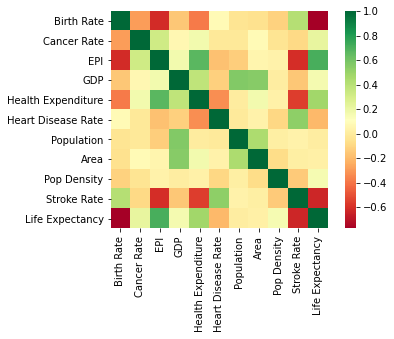

In [13]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

# Linear Regression just on feature GDP

In [14]:
y = df['Life Expectancy'].values
X_gdp = df['GDP'].values

In [15]:
print('Dimension of y before reshaping: {}'.format(y.shape))
print('Dimension of X before reshaping: {}'.format(X_gdp.shape))

Dimension of y before reshaping: (248,)
Dimension of X before reshaping: (248,)


In [16]:
y = y.reshape(-1,1)
X_gdp = X_gdp.reshape(-1,1)

In [17]:
print('Dimension of y after reshaping: {}'.format(y.shape))
print('Dimension of X after reshaping: {}'.format(X_gdp.shape))

Dimension of y after reshaping: (248, 1)
Dimension of X after reshaping: (248, 1)


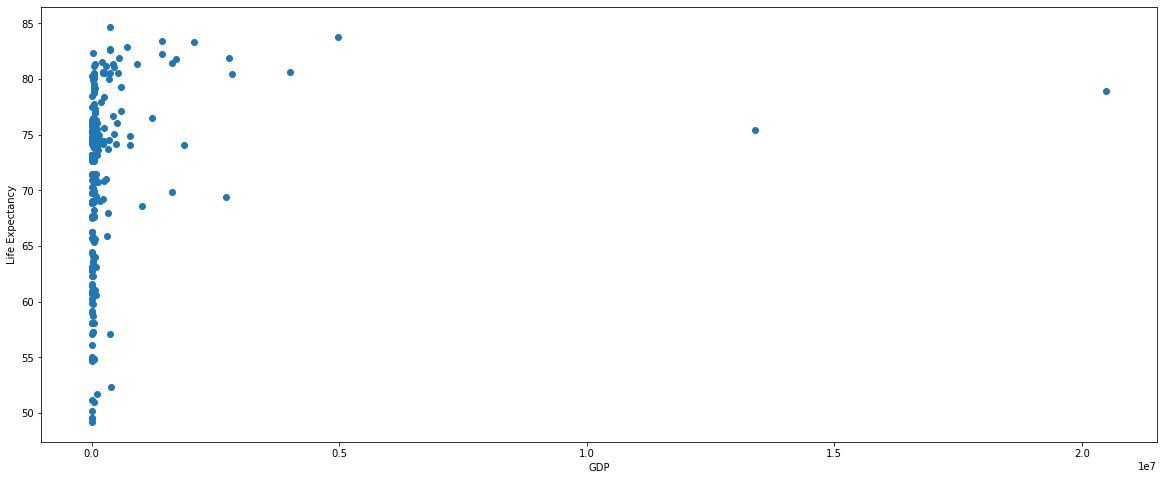

In [18]:
# scatter plot of y vs X_gdp
plt.figure(figsize=(20,8))
plt.scatter(X_gdp, y)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [19]:
# create the model
ln_reg = LinearRegression()

In [20]:
# introduce the new X
prediction_space = np.linspace(min(X_gdp), max(X_gdp)).reshape(-1,1)

In [21]:
# fitting the data
ln_reg.fit(X_gdp, y)

LinearRegression()

In [22]:
# predicting the labels for new X
y_pred = ln_reg.predict(prediction_space)

In [23]:
# print R^2
print(ln_reg.score(prediction_space, y_pred))

1.0


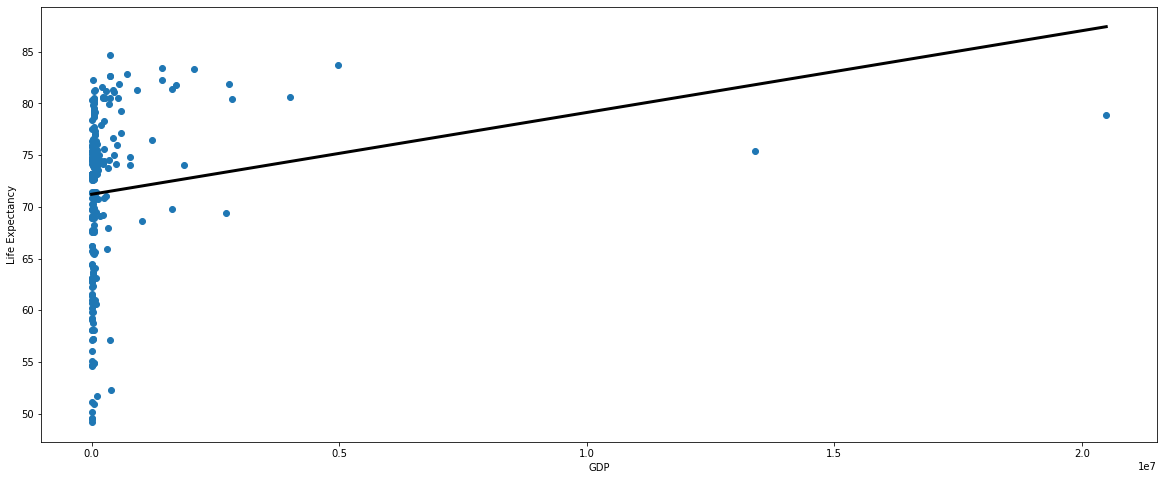

In [24]:
# plotting the regression line on original data
plt.figure(figsize=(20,8))
plt.scatter(X_gdp, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

# Linear Regression on all features

In [25]:
# deleting the non numeric values
df = df.drop(['Country'], axis=1)

In [26]:
df.head()

,Birth Rate,Cancer Rate,EPI,GDP,Health Expenditure,Heart Disease Rate,Population,Area,Pop Density,Stroke Rate,Life Expectancy
0,45.1,118.50,37.74,19585.0,46,263.34,24485600.0,652864.0,37.50,154.41,59.82
1,11.5,126.75,65.46,15202.0,204,126.59,3195000.0,28748.0,111.10,105.31,77.49
2,24.8,74.01,57.18,180441.0,228,110.05,35978000.0,2381741.0,15.10,74.66,74.42
3,23.5,109.11,56.18,41325.5,300,116.09,10526956.5,240302.5,74.75,83.21,73.19
4,10.2,109.11,56.18,41325.5,4596,116.09,10526956.5,240302.5,74.75,83.21,73.19


In [27]:
y = df['Life Expectancy'].values
X_all = df.drop(['Life Expectancy'], axis=1).values

In [28]:
# splitting the data to train and test parts
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

In [29]:
# create the model
ln_reg_all = LinearRegression()

In [30]:
# fitting the model to the train data
ln_reg_all.fit(X_train, y_train)

LinearRegression()

In [31]:
# predicting the data
y_pred = ln_reg_all.predict(X_test)

In [32]:
# accuracy
print('R^2: {}'.format(ln_reg_all.score(X_test, y_test)))
print('rmse: {}'.format(np.sqrt(mean_squared_error(y_pred, y_test))))

R^2: 0.6310206179912058
rmse: 4.499825132441039


# Linear Regression Ordinary Least Square OLS method in Statsmodels package

In [33]:
# slice data into features X and target y
X = df[ ['Birth Rate', 'Cancer Rate', 'EPI', 'GDP', 'Health Expenditure',
         'Heart Disease Rate', 'Population', 'Area', 'Pop Density', 'Stroke Rate'] ].astype(float)
X = sm.add_constant(X)

y = df[ "Life Expectancy" ].astype(float)    # y is a series

# Baseline results - model / fit / summarize
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     69.89
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           5.86e-65
Time:                        18:26:27   Log-Likelihood:                -689.18
No. Observations:                 248   AIC:                             1400.
Df Residuals:                     237   BIC:                             1439.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 74.3173      2.934     25.328      0.000      68.537      80.098
Birth Rate            -0.3980      0.033    -11.883      0.000      -0.464      -0.332
Cancer Rate           -0.0075      0.011     -0.708      0.480      -0.028       0.013
EPI                    0.1928      0.041      4.684      0.000       0.112       0.274
GDP                 2.625e-08   2.27e-07      0.116      0.908   -4.21e-07    4.73e-07
Health Expenditure    -0.0002      0.000     -0.929      0.354      -0.001       0.000
Heart Disease Rate     0.0046      0.005      0.882      0.378      -0.006       0.015
Population          2.452e-09   2.67e-09      0.918      0.359   -2.81e-09    7.71e-09
Area               -6.515e-08   1.85e-07     -0.351      0.726    -4.3e-07       3e-07
Pop Density            0.0009      0.001      1.636      0.103      -0.000       0.002
Stroke Rate           -0.0625      0.011     -5.885      0.000      -0.083      -0.042
==============================================================================
Omnibus:                       40.752   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.688
Skew:                          -0.786   Prob(JB):                     1.23e-20
Kurtosis:                       5.531   Cond. No.                     1.48e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# View the correlations
df.corr()

,Birth Rate,Cancer Rate,EPI,GDP,Health Expenditure,Heart Disease Rate,Population,Area,Pop Density,Stroke Rate,Life Expectancy
Birth Rate,1.000000,-0.288343,-0.609831,-0.152614,-0.383223,0.081743,-0.036634,-0.049987,-0.110965,0.411508,-0.773749
Cancer Rate,-0.288343,1.000000,0.326357,0.071357,0.170756,-0.012167,-0.013878,0.079802,-0.036197,-0.086140,0.223544
EPI,-0.609831,0.326357,1.000000,0.172591,0.670134,-0.176948,-0.124777,0.052162,0.043725,-0.604994,0.712191
GDP,-0.152614,0.071357,0.172591,1.000000,0.377842,-0.119002,0.566772,0.552363,0.013664,-0.154475,0.167084
Health Expenditure,-0.383223,0.170756,0.670134,0.377842,1.000000,-0.326271,0.007342,0.175360,0.030875,-0.552870,0.479436
Heart Disease Rate,0.081743,-0.012167,-0.176948,-0.119002,-0.326271,1.000000,-0.010816,0.038320,-0.091643,0.530978,-0.202466
Population,-0.036634,-0.013878,-0.124777,0.566772,0.007342,-0.010816,1.000000,0.442829,0.022135,0.039497,0.009788
Area,-0.049987,0.079802,0.052162,0.552363,0.175360,0.038320,0.442829,1.000000,-0.067425,0.019561,0.027417
Pop Density,-0.110965,-0.036197,0.043725,0.013664,0.030875,-0.091643,0.022135,-0.067425,1.000000,-0.137318,0.161463
Stroke Rate,0.411508,-0.086140,-0.604994,-0.154475,-0.552870,0.530978,0.039497,0.019561,-0.137318,1.000000,-0.629731


<AxesSubplot:>

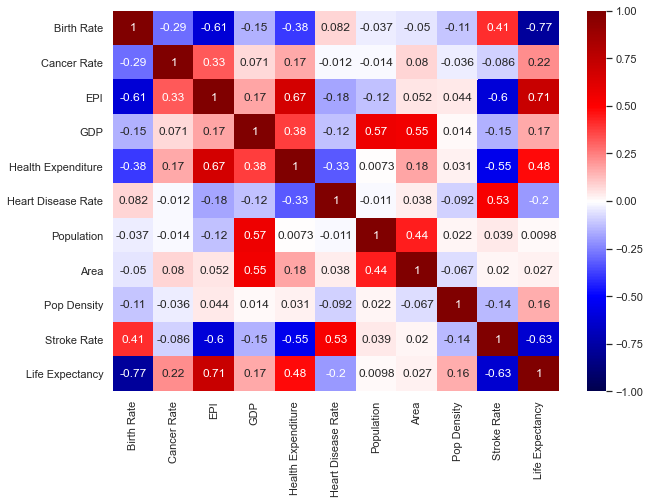

In [35]:
# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

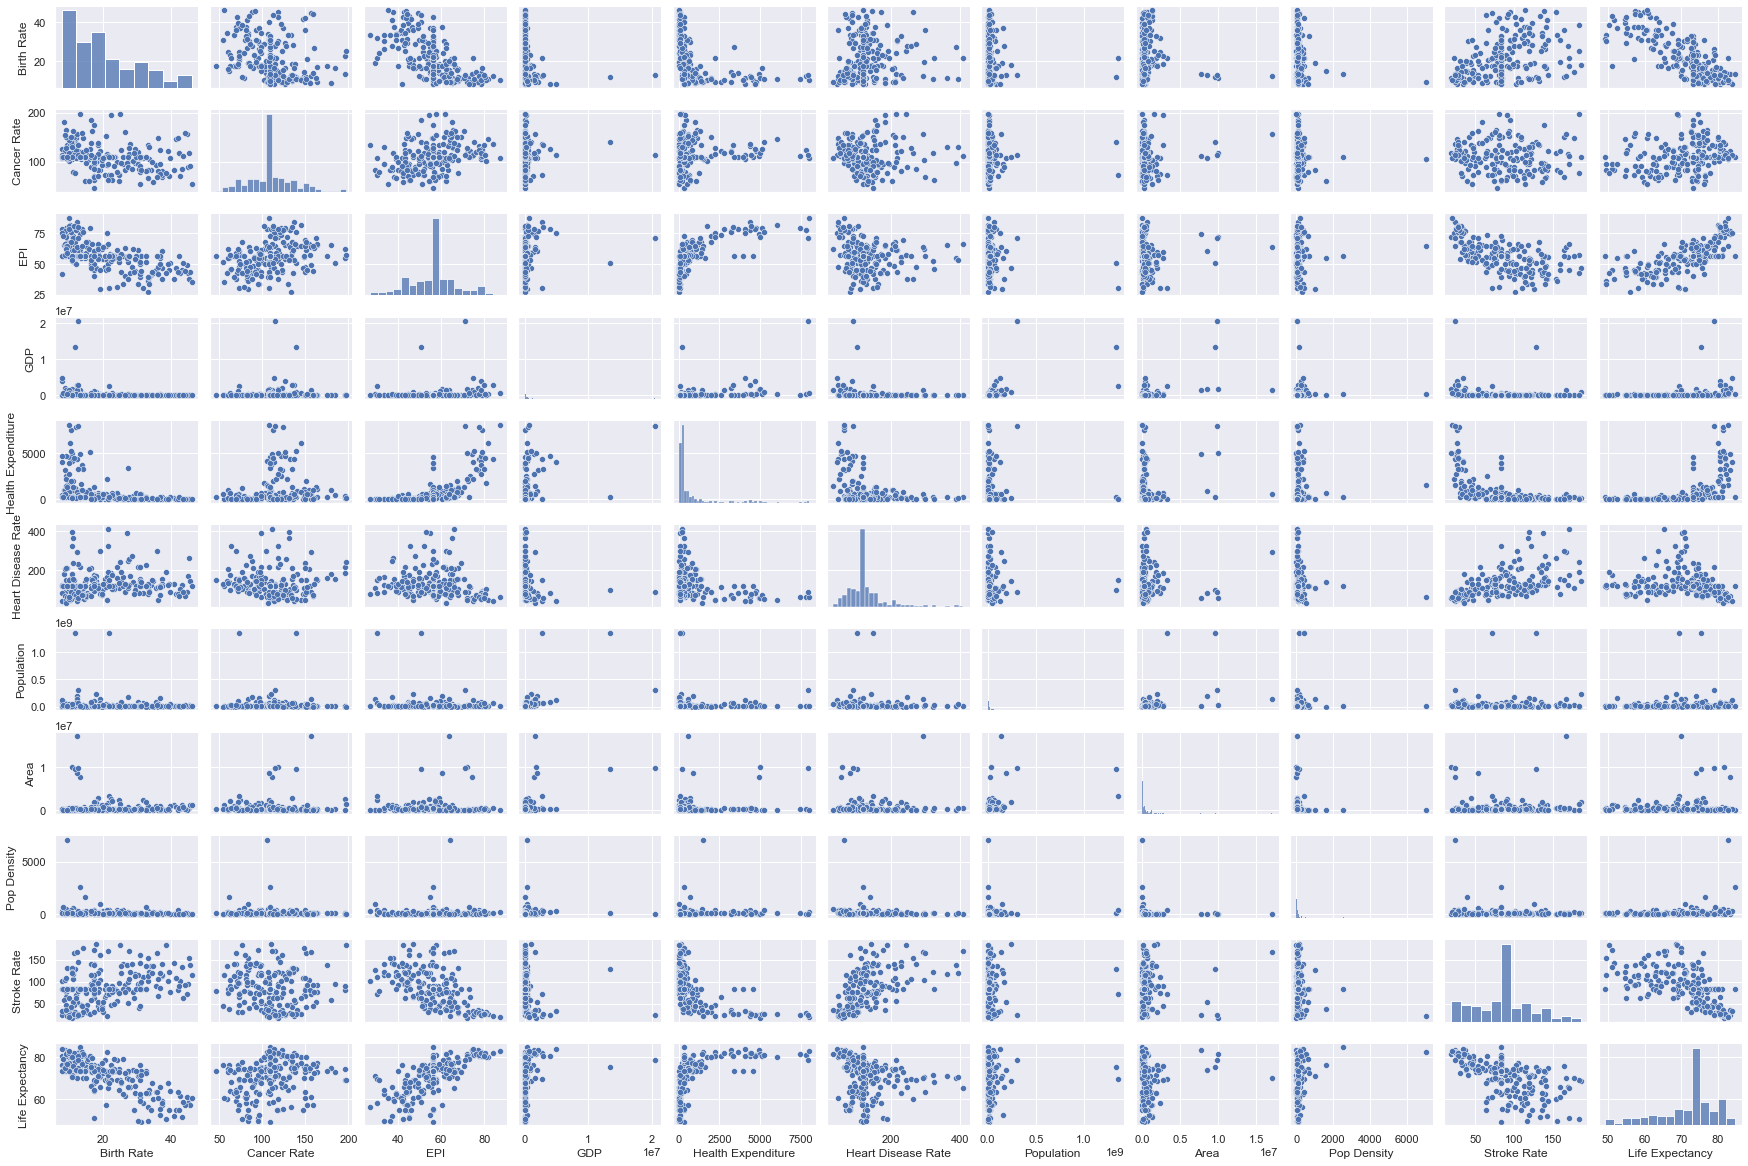

In [36]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df, height=1.5, aspect=1.5)

# Feature Selection by Applying Log

In [37]:
# Apply LOG function to all 10 features
df = pd.read_csv('final.csv')

df['Birth Rate']         = np.log( df['Birth Rate'] )
df['Cancer Rate']        = np.log( df['Cancer Rate'] )
df['EPI']                = np.log( df['EPI'] )
df['GDP']                = np.log( df['GDP'] )    
df['Health Expenditure'] = np.log( df['Health Expenditure'] )
df['Heart Disease Rate'] = np.log( df['Heart Disease Rate'] )  
df['Population']         = np.log( df['Population'] )  
df['Area']               = np.log( df['Area'] )   
df['Pop Density']        = np.log( df['Pop Density'] )
df['Stroke Rate']        = np.log( df['Stroke Rate'] )

In [38]:
# check results after applying LOG (R^2 = 0.740)
X, y = df.drop(columns=['Life Expectancy', 'Country'], axis=1), df['Life Expectancy']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     66.77
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           3.07e-63
Time:                        18:27:12   Log-Likelihood:                -693.37
No. Observations:                 248   AIC:                             1409.
Df Residuals:                     237   BIC:                             1447.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 63.9384     12.407      5.153      0.000      39.496      88.381
Birth Rate            -6.0973      0.867     -7.032      0.000      -7.805      -4.389
Cancer Rate           -0.5656      1.194     -0.474      0.636      -2.918       1.786
EPI                    8.1653      2.389      3.417      0.001       3.458      12.873
GDP                    0.5445      0.239      2.282      0.023       0.074       1.015
Health Expenditure     0.0825      0.410      0.201      0.841      -0.726       0.891
Heart Disease Rate     2.0386      0.840      2.427      0.016       0.384       3.693
Population            -6.0716      1.516     -4.006      0.000      -9.057      -3.086
Area                   5.9222      1.359      4.358      0.000       3.245       8.600
Pop Density            6.6461      1.374      4.836      0.000       3.939       9.353
Stroke Rate           -5.2131      0.978     -5.329      0.000      -7.140      -3.286
==============================================================================
Omnibus:                       47.614   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.495
Skew:                          -0.905   Prob(JB):                     1.67e-24
Kurtosis:                       5.705   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#outliers have been removed using the LOG function alone

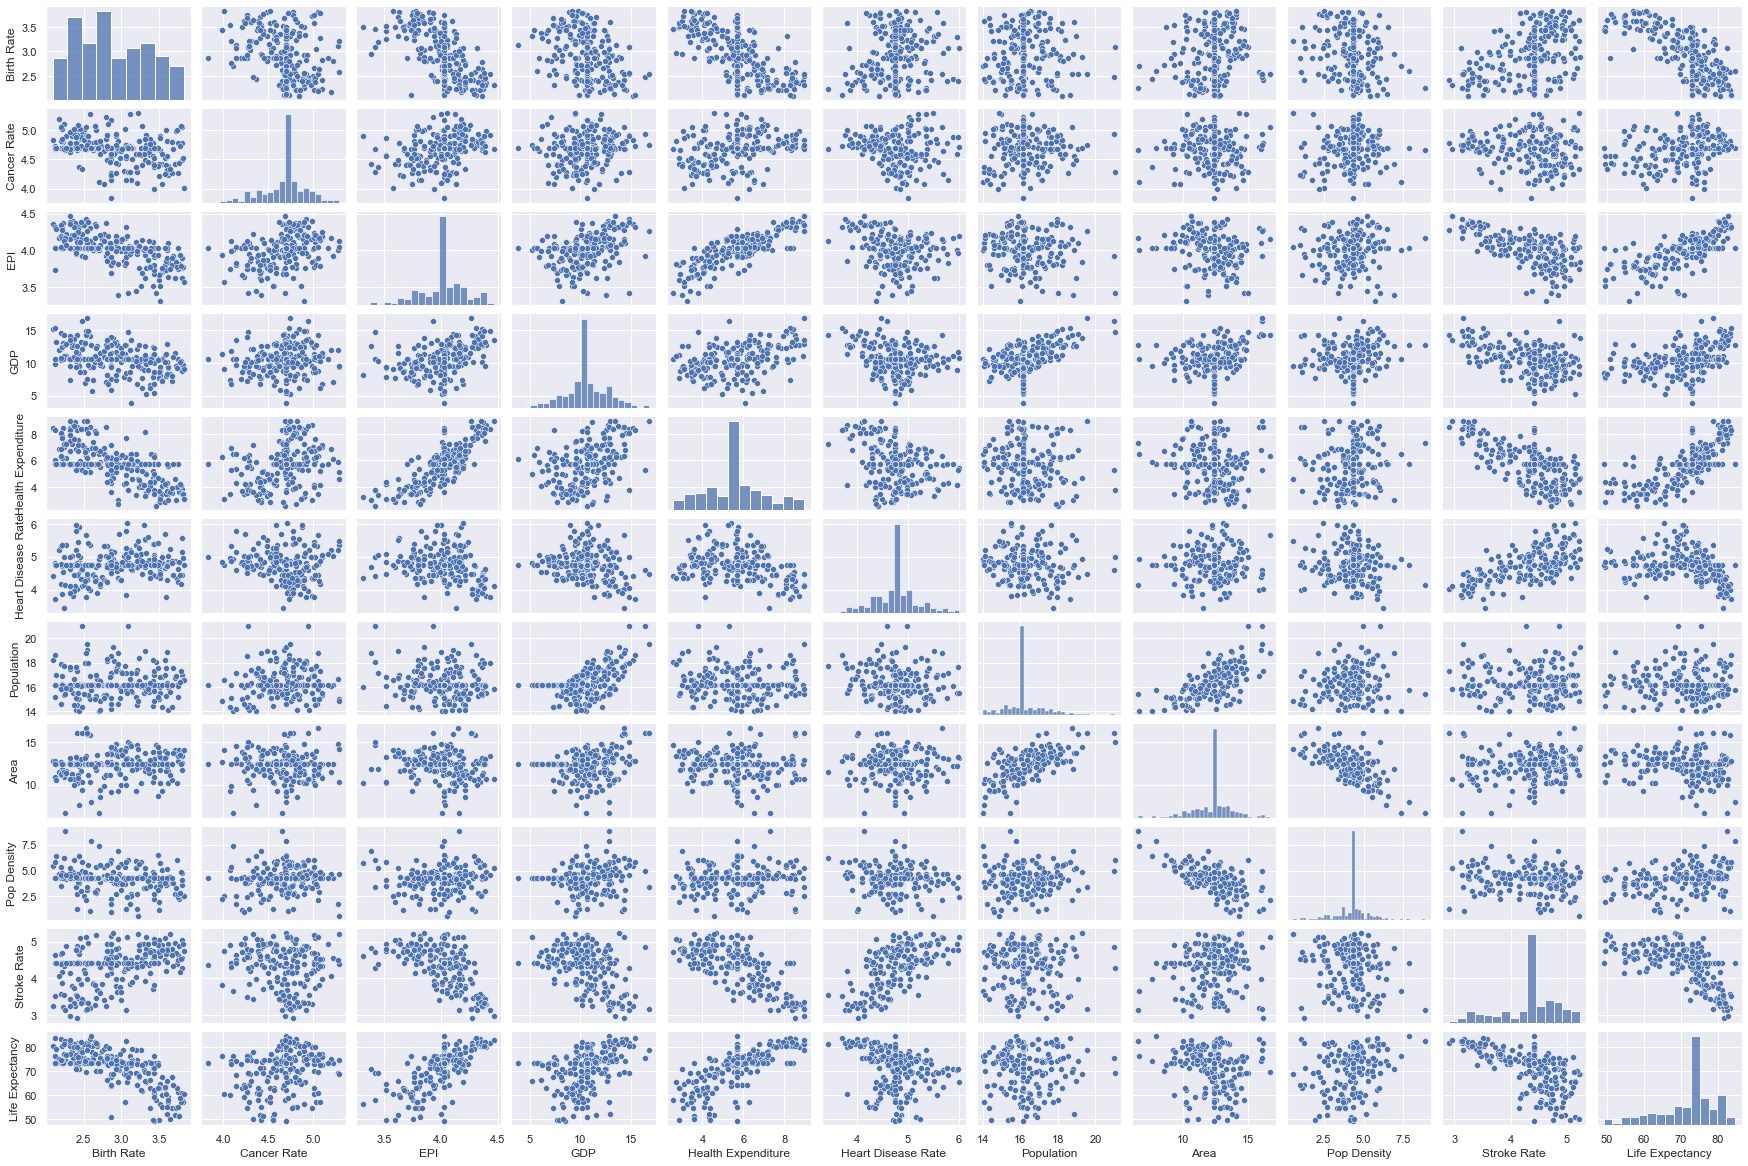

In [40]:
# Pair Plot with all 10 features
# Note: outliers have been removed using the LOG function alone
sns.pairplot(df, height=1.5, aspect=1.5)

# Regression with Statsmodels

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [42]:
# Ordinary Least Squares Regression with Statsmodels

df = pd.read_csv('final.csv')
df.drop('Country', axis=1, inplace=True)
df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9', 'X10', 'Y']
# df.head()

#1 Define the model
model = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10', data=df)
#2 Fit the model
result = model.fit()
#3 Print summary statistics of the model's performance
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     69.89
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           5.86e-65
Time:                        18:27:51   Log-Likelihood:                -689.18
No. Observations:                 248   AIC:                             1400.
Df Residuals:                     237   BIC:                             1439.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.3173      2.934     25.328      0.000      68.537      80.098
X1            -0.3980      0.033    -11.883      0.000      -0.464      -0.332
X2            -0.0075      0.011     -0.708      0.480      -0.028       0.013
X3             0.1928      0.041      4.684      0.000       0.112       0.274
X4          2.625e-08   2.27e-07      0.116      0.908   -4.21e-07    4.73e-07
X5            -0.0002      0.000     -0.929      0.354      -0.001       0.000
X6             0.0046      0.005      0.882      0.378      -0.006       0.015
X7          2.452e-09   2.67e-09      0.918      0.359   -2.81e-09    7.71e-09
X8         -6.515e-08   1.85e-07     -0.351      0.726    -4.3e-07       3e-07
X9             0.0009      0.001      1.636      0.103      -0.000       0.002
X10           -0.0625      0.011     -5.885      0.000      -0.083      -0.042
==============================================================================
Omnibus:                       40.752   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.688
Skew:                          -0.786   Prob(JB):                     1.23e-20
Kurtosis:                       5.531   Cond. No.                     1.48e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression using SkLearn

In [43]:
# # Ordinary Least Squares Regression with sklearn

df = pd.read_csv('final.csv')
df.drop('Country', axis=1, inplace=True)
df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9', 'X10', 'Y']
# df.head()

model = LinearRegression()
X = df[ ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9', 'X10'] ]
y = df[ ['Y'] ]
# Fit the model to the full dataset
model.fit(X, y)
# Print out the R^2 for the model against the full dataset
print(model.score(X, y))
# print out intercept
print(model.intercept_)
# print out other coefficients
print(model.coef_)

0.7467548974078393
[74.31728465]
[[-3.97966326e-01 -7.45904353e-03  1.92817114e-01  2.62502620e-08
  -2.45680618e-04  4.60217331e-03  2.45163016e-09 -6.51500622e-08
   8.63650792e-04 -6.25019622e-02]]


In [44]:
## FINAL set of 8 features
## use LOG function on all 8 features, outliers have been removed using the LOG function alone)
df = pd.read_csv('final.csv')
X = df[ ['Birth Rate', 'EPI', 'GDP', 'Heart Disease Rate', 'Population', 'Area', 'Pop Density', 'Stroke Rate'] ].astype(float)
X = np.log(X)
y = df[ "Life Expectancy" ].astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     84.05
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           4.13e-65
Time:                        18:27:51   Log-Likelihood:                -693.50
No. Observations:                 248   AIC:                             1405.
Df Residuals:                     239   BIC:                             1437.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.5325     11.975      5.222      0.000      38.942      86.123
Birth Rate            -6.0685      0.795     -7.638      0.000      -7.634      -4.503
EPI                    8.1298      1.990      4.085      0.000       4.209      12.050
GDP                    0.5668      0.233      2.436      0.016       0.109       1.025
Heart Disease Rate     2.1015      0.827      2.543      0.012       0.473       3.730
Population            -6.2355      1.461     -4.268      0.000      -9.113      -3.358
Area                   6.0517      1.317      4.595      0.000       3.457       8.646
Pop Density            6.7673      1.339      5.055      0.000       4.130       9.405
Stroke Rate           -5.3689      0.881     -6.093      0.000      -7.105      -3.633
==============================================================================
Omnibus:                       47.084   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.742
Skew:                          -0.897   Prob(JB):                     4.02e-24
Kurtosis:                       5.684   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
## to check R^2 score for all models with best alpha, using manual split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(198, 9)
(198,)
(50, 9)
(50,)


In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear regression val R^2: 0.711


# Conclusion

Linear Regression model

Unaffected by the features, your life expectancy is 62 years.

If your country has low birth rate, add 6 more years to your life.

If the EPI (Environment Performance Index) is high, add 8 more years to your life.

If you live in a rich country, add half a year to your life.

Finally for every unit (or rather LOG unit) decrease in stroke rate, 5 more years could be added to your life.

<AxesSubplot:>

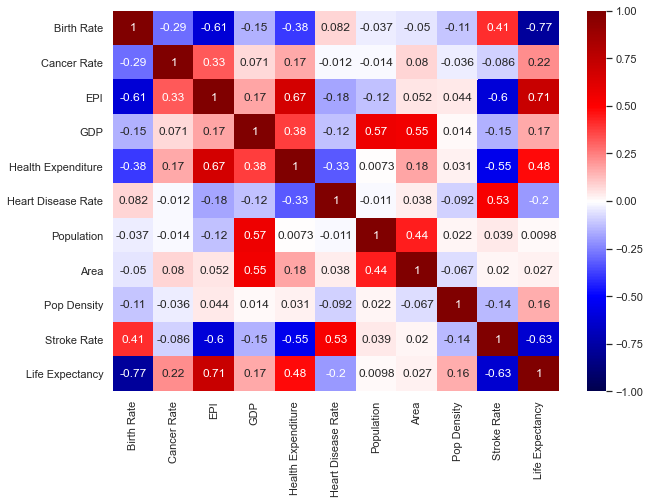

In [47]:
# Visualizing correlation with Seaborn, only FINAL 10 significant features
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

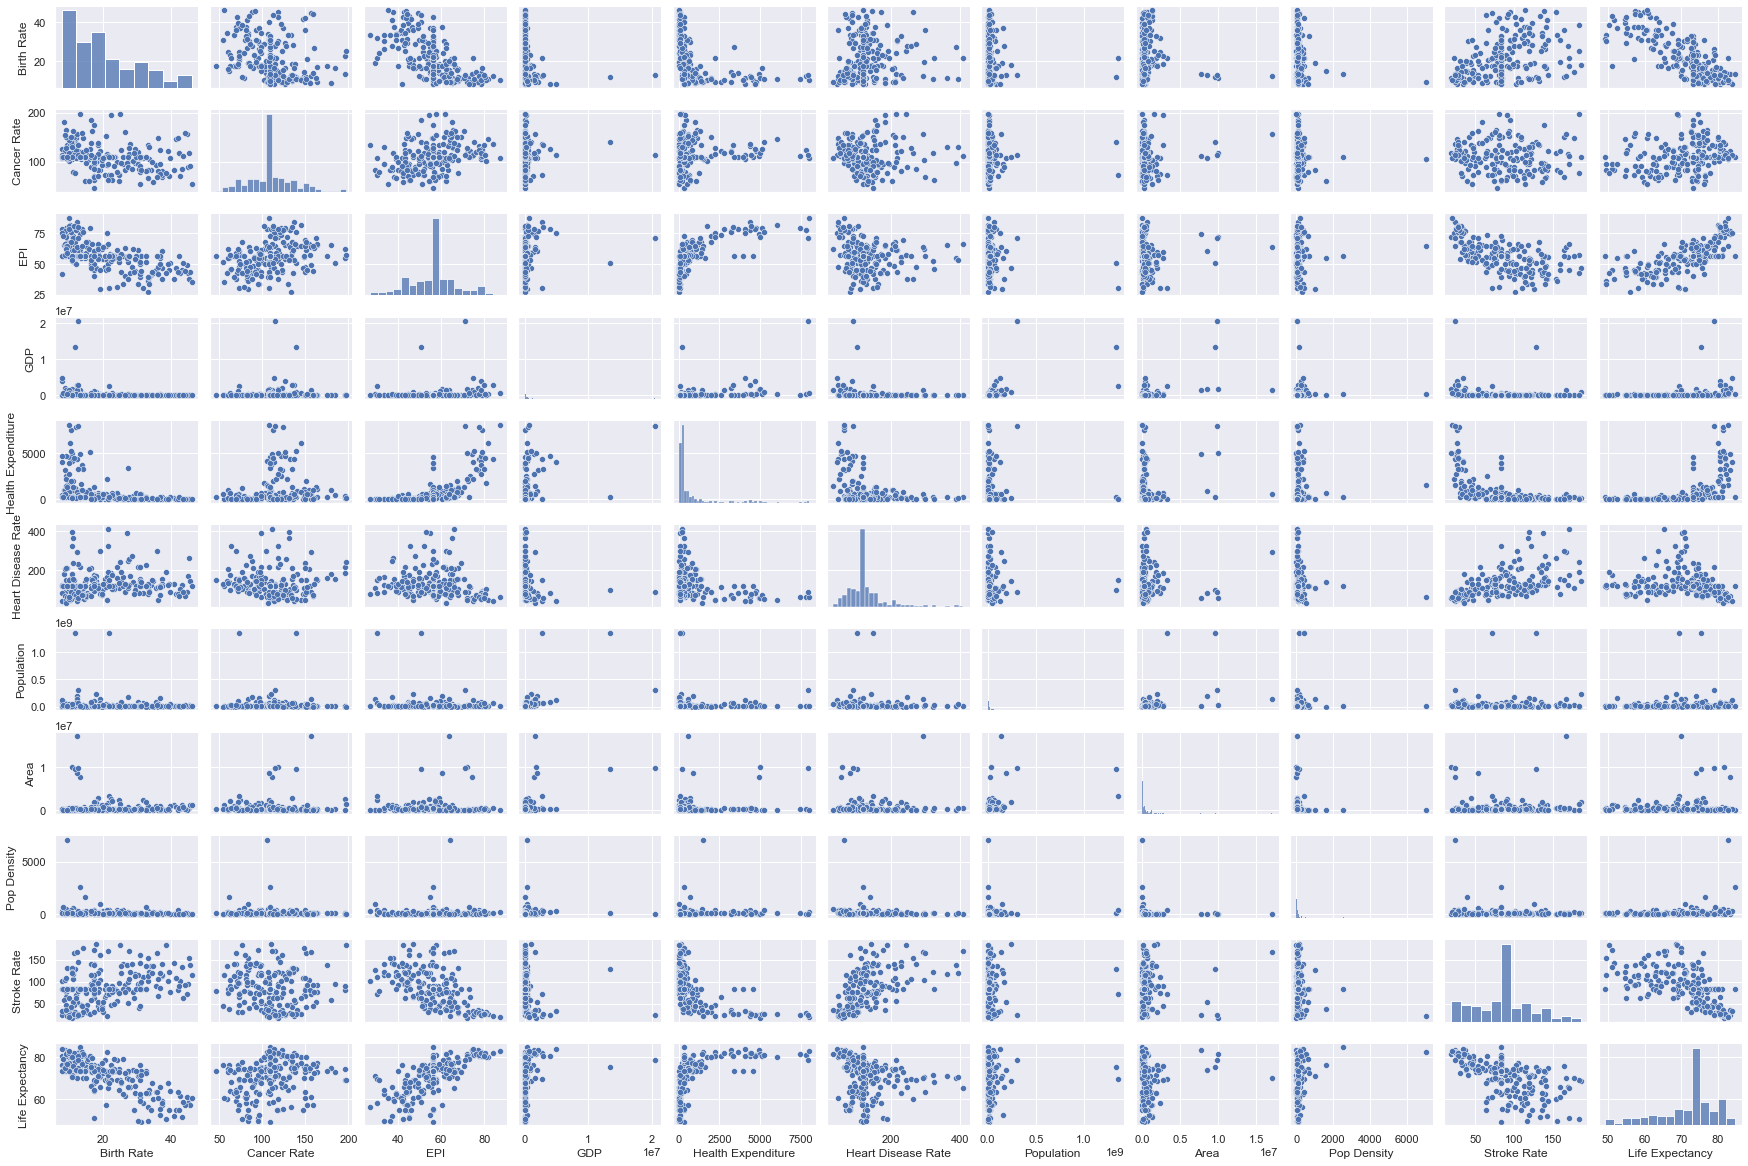

In [48]:
# Pair Plot with FINAL 8 significant features
# Note: outliers have been removed using the LOG function alone
sns.pairplot(df, height=1.5, aspect=1.5)

Text(0, 0.5, 'residuals')

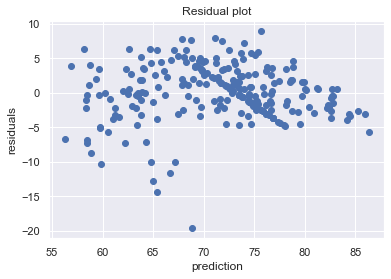

In [49]:
# Plot the residuals 
plt.figure(figsize=(6,4))
plt.scatter(results.predict(), results.resid)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

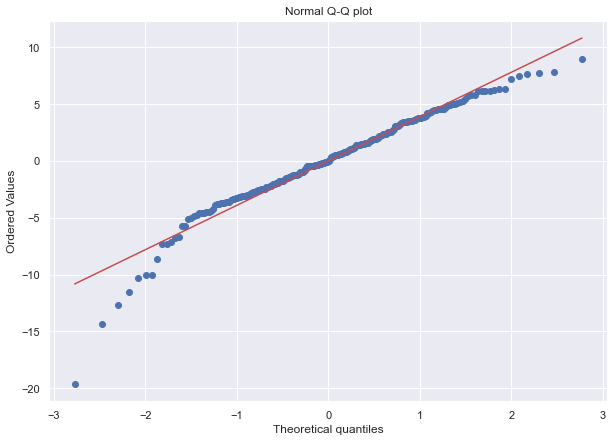

<Figure size 576x576 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [50]:
# Normal Q-Q Plot
import scipy.stats as stats

# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X,y) # for later use
# Plot your predicted values on the x-axis, and your residuals on the y-axis
df['predict'] = fit.predict(X)
df['resid'] = y - df.predict
# diagnose/inspect residual normality using qqplot:
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.figure(figsize=(8,8))
plt.show()
plt.savefig("diagnostics.svg")

In [53]:
#set up the 5 models for training & validation:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear regression val R^2: {lm.score(X_val, y_val):.3f}')

#Feature scaling for train/val data so that we can run our ridge/lasso/elasticnet model on each
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

lm_ridge = Ridge(alpha=0.2097046401323233)
lm_ridge.fit(X_train_scaled, y_train)
print(f'Ridge regression val R^2: {lm_ridge.score(X_val_scaled, y_val):.3f}')

lm_lasso = Lasso(alpha=0.0032550885998350564)
lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso regression val R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}')

lm_elasticnet = ElasticNet(alpha=0.0016257556664437934)
lm_elasticnet.fit(X_train_scaled, y_train)
print(f'ElasticNet regression val R^2: {lm_elasticnet.score(X_val_scaled, y_val):.3f}')

#Feature transforms for train/val data so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear regression val R^2: 0.711
Ridge regression val R^2: 0.710
Lasso regression val R^2: 0.711
ElasticNet regression val R^2: 0.711
Degree 2 polynomial regression val R^2: 0.666
